# I.Part 1.Data Cleaning:

## Scrapping tables information and transforming them into a Pandas dataframe

Importing libraries

In [54]:
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner

We can use the function read_html(url) to get webpage contents.

In [2]:
#Using read_html function of pd. 
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
dfs = pd.read_html(url)
print(len(dfs))
dfs

3


[    Postal Code           Borough  \
 0           M1A      Not assigned   
 1           M2A      Not assigned   
 2           M3A        North York   
 3           M4A        North York   
 4           M5A  Downtown Toronto   
 ..          ...               ...   
 175         M5Z      Not assigned   
 176         M6Z      Not assigned   
 177         M7Z      Not assigned   
 178         M8Z         Etobicoke   
 179         M9Z      Not assigned   
 
                                          Neighbourhood  
 0                                         Not assigned  
 1                                         Not assigned  
 2                                            Parkwoods  
 3                                     Victoria Village  
 4                            Regent Park, Harbourfront  
 ..                                                 ...  
 175                                       Not assigned  
 176                                       Not assigned  
 177                

In [85]:
#Setting maxcolwidth to 800 for good viewability
pd.set_option('max_colwidth', 800)

In [3]:
#So, there are 3 tables in the webpage : 1.postal code, Borough, Neighborhood 
#2.Most populated FSAs 3. Least populated FSAs
df1=dfs[0]  # Getting the first table
df1

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
...,...,...,...
175,M5Z,Not assigned,Not assigned
176,M6Z,Not assigned,Not assigned
177,M7Z,Not assigned,Not assigned
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


Omitting the rows with unassigned boroughs.

In [10]:
#Ignoring cells with a borough that is Not assigned.
df2=df1.loc[df1['Borough']!='Not assigned']
df2

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [73]:
#Resetting the index column
df3=df2.reset_index(drop=True) #and dropping the old index column.
df3

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


After omitting the rows with Not assigned Borroughs, we want to see if there are 
still Neighbourhoods Not assigned remained in the df.
if a cell has a borough, but a Not assigned neighborhood, 
then the neighborhood will be the same as the borough.

In [24]:
df4 = df3.loc[df3['Neighbourhood'] == 'Not assigned']
df4

,Postal Code,Borough,Neighbourhood


So, all of our remaining Neighbourhoods are already assigned.

In [25]:
#using the shape method to print the number of rows of our dataframe.
df3.shape

(103, 3)

# II. Part 2. Getting the latitude and the longitude coordinates of each neighborhood

**Now that we have built a dataframe of the postal code of each neighborhood along with the borough name and neighborhood name, in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood.** 


In [36]:
!pip install geocoder

In [43]:
#Forward Geocoding
import geocoder
g = geocoder.google('Mountain View, CA')
g.latlng

In [47]:
#Reverse Geocoding
g = geocoder.google([45.15, -75.14], method='reverse') 
g.city

We use the csv file of coordinations to read the data from.

In [70]:
#Reading from the link to a csv file that has the geographical coordinates of each postal code: http://cocl.us/Geospatial_data
lat_lng_coords1= pd.read_csv('http://cocl.us/Geospatial_data')
lat_lng_coords1

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


sorting the df based on Postal Codes column order

In [75]:
#sorting the df based on Postal Codes column order (similar to that of the csv file)
df4=df3.sort_values('Postal Code')
df4

,Postal Code,Borough,Neighbourhood
6,M1B,Scarborough,"Malvern, Rouge"
12,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
18,M1E,Scarborough,"Guildwood, Morningside, West Hill"
22,M1G,Scarborough,Woburn
26,M1H,Scarborough,Cedarbrae
...,...,...,...
64,M9N,York,Weston
70,M9P,Etobicoke,Westmount
77,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ..."
89,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest..."


In [76]:
#Resetting the index column
df5=df4.reset_index(drop=True) #and dropping the old index column.
df5

,Postal Code,Borough,Neighbourhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
...,...,...,...
98,M9N,York,Weston
99,M9P,Etobicoke,Westmount
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ..."
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest..."


Now we join the two dataframes

In [87]:
# joining the DataFrames 
df6=pd.merge(df5,lat_lng_coords1, on='Postal Code', how = "outer")
#If we use how = "Outer", it returns all elements in df1 and df2 but if element column are null then its return NaN value.
df6

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188
99,M9P,Etobicoke,Westmount,43.696319,-79.532242
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove Gardens, Richview Gardens",43.688905,-79.554724
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamestown, Mount Olive, Beaumond Heights, Thistletown, Albion Gardens",43.739416,-79.588437


In [84]:
# Double-checking of not having any NaN in the merged df.
df6.isnull().values.any()

False

So, our dataframe is fine.

# III. Part 3. Exploring and clustering the neighborhoods in Toronto. 

**We can decide to work with only boroughs that contain the word Toronto.**

In [91]:
df7=df6[df6['Borough'].str.contains("Toronto")]
df7

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
37,M4E,East Toronto,The Beaches,43.676357,-79.293031
41,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
42,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
43,M4M,East Toronto,Studio District,43.659526,-79.340923
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
45,M4P,Central Toronto,Davisville North,43.712751,-79.390197
46,M4R,Central Toronto,"North Toronto West, Lawrence Park",43.715383,-79.405678
47,M4S,Central Toronto,Davisville,43.704324,-79.388790
48,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
49,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park",43.686412,-79.400049


In [105]:
#Resetting the index column
Tneighbourhoods=df7.reset_index(drop=True) #and dropping the old index column.
Tneighbourhoods

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
5,M4P,Central Toronto,Davisville North,43.712751,-79.390197
6,M4R,Central Toronto,"North Toronto West, Lawrence Park",43.715383,-79.405678
7,M4S,Central Toronto,Davisville,43.704324,-79.388790
8,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
9,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park",43.686412,-79.400049


In [106]:
print('The dataframe has {} borough and {} neighbourhood.'
      .format(len(Tneighbourhoods['Borough'].unique()), Tneighbourhoods.shape[0]))

The dataframe has 4 borough and 39 neighbourhood.


Before we get the data and start exploring it, let's download all the dependencies that we will need.


In [93]:
#Changing max columns to be displayed to no limit
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim 

import requests # library to handle requests
# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize 

# Matplotlib and associated plotting modules
import matplotlib.cm as cm      
import matplotlib.colors as colors


# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


Use **geopy library** to get the latitude and longitude values of Toronto.
In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent Tor_explorer, as shown below.

In [98]:
address= 'Toronto, ON'
#Generating a geocoders instance using Nominatim function that converts the addresses into longitudes and latitudes.
geolocator = Nominatim(user_agent="Tor.explorer")
location=geolocator.geocode(address)
latitude=location.latitude
longitude=location.longitude
print('The georgraphical coordinates of Toronto are {}, {}.'
      .format(latitude, longitude))

The georgraphical coordinates of Toronto are 43.6534817, -79.3839347.


***Creating a map of New York with neighborhoods superimposed on top.***

In [113]:
# create a map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighbourhood in zip(Tneighbourhoods['Latitude'], Tneighbourhoods['Longitude'], Tneighbourhoods['Borough'], Tneighbourhoods['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)  
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

Since the github link does not show the folium map I added a scanned copy of the map from Jupyter Notebook.

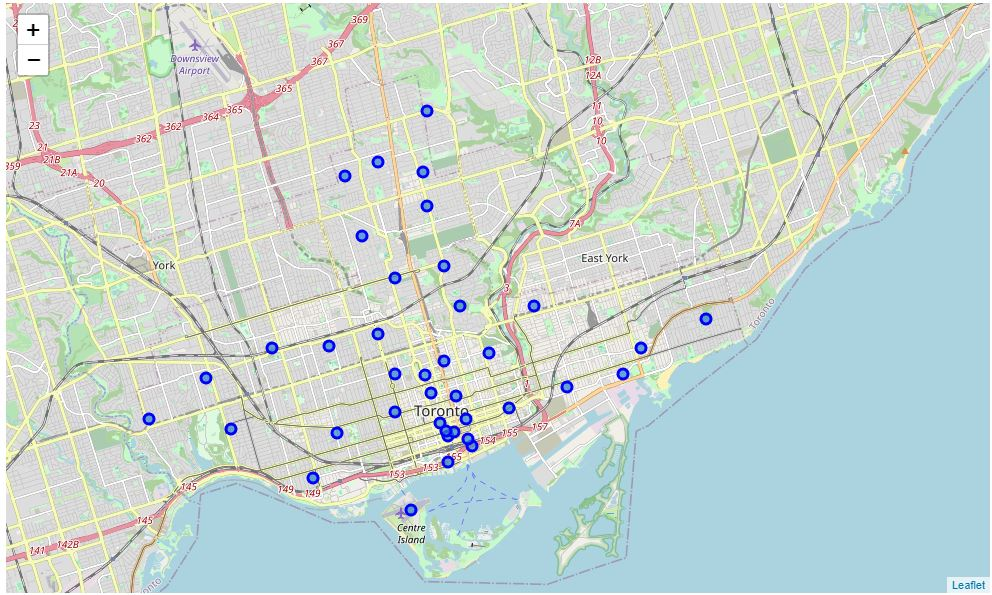

Folium is a great visualization library. Feel free to zoom into the above map, and click on each circle mark to reveal the name of the neighborhood and its respective borough.


Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.


### Define Foursquare Credentials and Version


In [114]:
CLIENT_ID = 'XGF4JG24CDO3NBN2E2AT12KAODIK0BZDUD01QSKSEX55OOF4' # your Foursquare ID
CLIENT_SECRET = 'BJEB1QCCESQJ5VLZXKYPDJFJW0DTNT4C0BSAC0R0DWMNWPYR' # your Foursquare Secret
VERSION = '20201227' # Foursquare API version  
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: XGF4JG24CDO3NBN2E2AT12KAODIK0BZDUD01QSKSEX55OOF4
CLIENT_SECRET:BJEB1QCCESQJ5VLZXKYPDJFJW0DTNT4C0BSAC0R0DWMNWPYR


**Let's explore the first neighborhood in our dataframe.**


In [115]:
Tneighbourhoods.loc[0,'Neighbourhood']

'The Beaches'

Get the neighborhood's (The Beaches) latitude and longitude values.


In [117]:
neighborhood_latitude = Tneighbourhoods.loc[0, 'Latitude'] # neighborhood latitude value 
neighborhood_longitude = Tneighbourhoods.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = Tneighbourhoods.loc[0, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))


Latitude and longitude values of The Beaches are 43.67635739999999, -79.2930312.


Now, let's get the top 100 venues that are in The Beaches within a radius of 500 meters.


First, let's create the GET request URL. Name your URL url.


In [118]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=XGF4JG24CDO3NBN2E2AT12KAODIK0BZDUD01QSKSEX55OOF4&client_secret=BJEB1QCCESQJ5VLZXKYPDJFJW0DTNT4C0BSAC0R0DWMNWPYR&v=20201227&ll=43.67635739999999,-79.2930312&radius=500&limit=100'

Send the GET request and examine the resutls

In [121]:
results=requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ff0d19f1fbc1169c9a17af1'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'The Beaches',
  'headerFullLocation': 'The Beaches, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 6,
  'suggestedBounds': {'ne': {'lat': 43.680857404499996,
    'lng': -79.28682091449052},
   'sw': {'lat': 43.67185739549999, 'lng': -79.29924148550948}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bd461bc77b29c74a07d9282',
       'name': 'Glen Manor Ravine',
       'location': {'address': 'Glen Manor',
        'crossStreet': 'Queen St.',
        'lat': 43.67682094413784,
        'lng': -79.29394208780985,
        'labeledLatLngs': [{'labe

From the Foursquare lab in the previous module, we know that all the information is in the items key. Before we proceed, let's borrow the get_category_type function from the Foursquare lab.


In [122]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a pandas dataframe.

In [209]:
# generating a dataframe from the selected keys' values of the requested json file
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON
nearby_venues.head()

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.postalCode,venue.venuePage.id
0,e-0-4bd461bc77b29c74a07d9282-0,0,"[{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]",4bd461bc77b29c74a07d9282,Glen Manor Ravine,Glen Manor,Queen St.,43.676821,-79.293942,"[{'label': 'display', 'lat': 43.67682094413784, 'lng': -79.29394208780985}]",89,CA,Toronto,ON,Canada,"[Glen Manor (Queen St.), Toronto ON, Canada]","[{'id': '4bf58dd8d48988d159941735', 'name': 'Trail', 'pluralName': 'Trails', 'shortName': 'Trail', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/hikingtrail_', 'suffix': '.png'}, 'primary': True}]",0,[],NaN,NaN
1,e-0-4ad4c062f964a52011f820e3-1,0,"[{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]",4ad4c062f964a52011f820e3,The Big Carrot Natural Food Market,125 Southwood Dr,NaN,43.678879,-79.297734,"[{'label': 'display', 'lat': 43.678879, 'lng': -79.297734}]",471,CA,Toronto,ON,Canada,"[125 Southwood Dr, Toronto ON M4E 0B8, Canada]","[{'id': '50aa9e744b90af0d42d5de0e', 'name': 'Health Food Store', 'pluralName': 'Health Food Stores', 'shortName': 'Health Food Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_', 'suffix': '.png'}, 'primary': True}]",0,[],M4E 0B8,75150878
2,e-0-4b8daea1f964a520480833e3-2,0,"[{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]",4b8daea1f964a520480833e3,Grover Pub and Grub,676 Kingston Rd.,at Main St.,43.679181,-79.297215,"[{'label': 'display', 'lat': 43.679181434941015, 'lng': -79.29721535878515}]",460,CA,Toronto,ON,Canada,"[676 Kingston Rd. (at Main St.), Toronto ON M4E 1R4, Canada]","[{'id': '4bf58dd8d48988d11b941735', 'name': 'Pub', 'pluralName': 'Pubs', 'shortName': 'Pub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_', 'suffix': '.png'}, 'primary': True}]",0,[],M4E 1R4,NaN
3,e-0-4df91c4bae60f95f82229ad5-3,0,"[{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]",4df91c4bae60f95f82229ad5,Upper Beaches,NaN,NaN,43.680563,-79.292869,"[{'label': 'display', 'lat': 43.68056321147582, 'lng': -79.2928688743688}]",468,CA,Toronto,ON,Canada,"[Toronto ON, Canada]","[{'id': '4f2a25ac4b909258e854f55f', 'name': 'Neighborhood', 'pluralName': 'Neighborhoods', 'shortName': 'Neighborhood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/neighborhood_', 'suffix': '.png'}, 'primary': True}]",0,[],NaN,NaN
4,e-0-4bc7fcce6501c9b6bf813f29-4,0,"[{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]",4bc7fcce6501c9b6bf813f29,Dip 'n Sip,663 Kingston Road,Main St,43.678897,-79.297745,"[{'label': 'display', 'lat': 43.67889707815811, 'lng': -79.29774501670785}]",473,CA,Toronto,ON,Canada,"[663 Kingston Road (Main St), Toronto ON, Canada]","[{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}]",0,[],NaN,NaN


In [210]:
# filter desired columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues.head()

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Glen Manor Ravine,"[{'id': '4bf58dd8d48988d159941735', 'name': 'Trail', 'pluralName': 'Trails', 'shortName': 'Trail', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/hikingtrail_', 'suffix': '.png'}, 'primary': True}]",43.676821,-79.293942
1,The Big Carrot Natural Food Market,"[{'id': '50aa9e744b90af0d42d5de0e', 'name': 'Health Food Store', 'pluralName': 'Health Food Stores', 'shortName': 'Health Food Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_', 'suffix': '.png'}, 'primary': True}]",43.678879,-79.297734
2,Grover Pub and Grub,"[{'id': '4bf58dd8d48988d11b941735', 'name': 'Pub', 'pluralName': 'Pubs', 'shortName': 'Pub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_', 'suffix': '.png'}, 'primary': True}]",43.679181,-79.297215
3,Upper Beaches,"[{'id': '4f2a25ac4b909258e854f55f', 'name': 'Neighborhood', 'pluralName': 'Neighborhoods', 'shortName': 'Neighborhood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/neighborhood_', 'suffix': '.png'}, 'primary': True}]",43.680563,-79.292869
4,Dip 'n Sip,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}]",43.678897,-79.297745


In [211]:
# filter the category column values for each row 
#(using the defined get_category_type that extracts the category of venue)
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
nearby_venues['venue.categories']

0                Trail
1    Health Food Store
2                  Pub
3         Neighborhood
4          Coffee Shop
5     Asian Restaurant
Name: venue.categories, dtype: object

In [136]:
#cleaning the columns' headings
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues.columns

Index(['name', 'categories', 'lat', 'lng'], dtype='object')

In [137]:
nearby_venues

,name,categories,lat,lng
0,Glen Manor Ravine,Trail,43.676821,-79.293942
1,The Big Carrot Natural Food Market,Health Food Store,43.678879,-79.297734
2,Grover Pub and Grub,Pub,43.679181,-79.297215
3,Upper Beaches,Neighborhood,43.680563,-79.292869
4,Dip 'n Sip,Coffee Shop,43.678897,-79.297745
5,Seaspray Restaurant,Asian Restaurant,43.678888,-79.298167


In [138]:
#The number of venues in the first neighborhood (The Beaches) by the Foursquare API 
#base on our selected conditions. e.g. radius of500 meter from the neighbourhood center.
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

6 venues were returned by Foursquare.


### Explore Neighborhoods in Toronto


Let's create a function to repeat the same process (that we just did on the 1st neighborhood) to all the neighborhoods in Toronto, autoamtically.


In [145]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now write the code to run the above function on each neighborhood and create a new dataframe called toronto_venues.


In [146]:
toronto_venues = getNearbyVenues(names=Tneighbourhoods['Neighbourhood'],
                                   latitudes=Tneighbourhoods['Latitude'],
                                   longitudes=Tneighbourhoods['Longitude']
                                  )

The Beaches
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Lawrence Park
Davisville North
North Toronto West, Lawrence Park
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North & West, Forest Hill Road Park
The Annex, North Midtown, Yorkville
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Stn A PO Boxes
First Canadian Place, Underground city
Christie
Dufferin, Dovercourt Village
Little Portugal, Trinity
Brockton, Parkdale Village, Exhibition Place
High 

Let's check the size of the resulting dataframe


In [147]:
print(toronto_venues.shape)
toronto_venues.head()

(1624, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,The Beaches,43.676357,-79.293031,Dip 'n Sip,43.678897,-79.297745,Coffee Shop


Let's check how many venues were returned for each neighborhood


In [148]:
toronto_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Berczy Park,58,58,58,58,58,58
"Brockton, Parkdale Village, Exhibition Place",22,22,22,22,22,22
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",17,17,17,17,17,17
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",16,16,16,16,16,16
Central Bay Street,65,65,65,65,65,65
Christie,16,16,16,16,16,16
Church and Wellesley,79,79,79,79,79,79
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,38,38,38,38,38,38


Let's find out how many unique categories was selected from all the returned venues

In [149]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))


There are 235 uniques categories.


## Analyze Each Neighborhood

In [164]:
#generating a df columns from the 'Venue Category' column values 
# of toronto_venues df and calling it toronto_onehot
# also, replacing the prefix and prefix_separators from the generated columns heads with space
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")
toronto_onehot.head()
                                

,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [166]:
# adding neighborhood column from toronto venues back to dataframe (as the last column)

toronto_onehot['Neighbourhood']=toronto_venues['Neighbourhood']
toronto_onehot.head()

,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio,Neighbourhood
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,The Beaches
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [167]:
#returning the last columns head of toronto_onehot
toronto_onehot.columns[-1]

'Neighbourhood'

In [168]:
#returning all the columns heads of toronto_onehot, except for the last columns head
(toronto_onehot.columns[:-1])

Index(['Adult Boutique', 'Airport', 'Airport Food Court', 'Airport Gate',
       'Airport Lounge', 'Airport Service', 'Airport Terminal',
       'American Restaurant', 'Antique Shop', 'Aquarium',
       ...
       'Tibetan Restaurant', 'Toy / Game Store', 'Trail', 'Train Station',
       'Vegetarian / Vegan Restaurant', 'Video Game Store',
       'Vietnamese Restaurant', 'Wine Bar', 'Wine Shop', 'Yoga Studio'],
      dtype='object', length=235)

In [169]:
# move Neighborhood column to the first column
#since the original last column (neighborhood) comes first.
fixed_columns=[toronto_onehot.columns[-1]]+list(toronto_onehot.columns[:-1])
fixed_columns[0:10]

['Neighbourhood',
 'Adult Boutique',
 'Airport',
 'Airport Food Court',
 'Airport Gate',
 'Airport Lounge',
 'Airport Service',
 'Airport Terminal',
 'American Restaurant',
 'Antique Shop']

In [170]:
#making a df with first column head of Neighborhood
toronto_onehot=toronto_onehot[fixed_columns]
toronto_onehot.head()

,Neighbourhood,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [171]:
#Again examining the dataframe size
toronto_onehot.shape

(1624, 236)

Next, let's group rows by neighbourhood and by taking the mean of the frequency of occurrence of each category. By taking the mean from the number of time each category occurs in each neighborhood, in fact, we get their frequency of occurrence.


In [173]:
toronto_grouped= toronto_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_grouped

,Neighbourhood,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,Berczy Park,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.000000,0.00,0.017241,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.017241,0.034483,0.000000,0.000000,0.00,0.017241,0.017241,0.000000,0.034483,0.000000,0.000000,0.017241,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.017241,0.017241,0.000000,0.0000,0.000000,0.034483,0.000000,0.000000,0.000000,0.000000,0.017241,0.051724,0.103448,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.017241,0.000000,0.017241,0.000000,0.000000,0.000000,0.017241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017241,0.000000,0.000000,

**Confirming the new size**

In [174]:
toronto_grouped.shape

(39, 236)

Let's print each neighborhood along with the top 5 most common venues


**Let's put that into a pandas dataframe**


First, let's write a function to sort the venues in descending order.


In [178]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [180]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']



# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = toronto_grouped['Neighbourhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Seafood Restaurant,Farmers Market,Bakery,Restaurant,Cheese Shop,Beer Bar,Diner,Jazz Club
1,"Brockton, Parkdale Village, Exhibition Place",Café,Coffee Shop,Breakfast Spot,Italian Restaurant,Intersection,Bar,Stadium,Bakery,Climbing Gym,Furniture / Home Store
2,"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",Light Rail Station,Yoga Studio,Auto Workshop,Gym / Fitness Center,Garden Center,Garden,Fast Food Restaurant,Farmers Market,Comic Shop,Park
3,"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",Airport Lounge,Airport Service,Airport Terminal,Harbor / Marina,Boat or Ferry,Coffee Shop,Rental Car Location,Sculpture Garden,Boutique,Plane
4,Central Bay Street,Coffee Shop,Italian Restaurant,Sandwich Place,Café,Bubble Tea Shop,Thai Restaurant,Salad Place,Burger Joint,Miscellaneous Shop,Modern European Restaurant


## Cluster Neighbourhoods

Run k-means to cluster the neighborhood into 5 clusters.

In [181]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)

# run k-means clustering
#creating the KMeans clustering object and fitting it to the real data in one line
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 


array([4, 4, 4, 4, 4, 2, 4, 4, 4, 4])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.


In [188]:
Tneighbourhoods['Postal Code'].head()

0    M4E
1    M4K
2    M4L
3    M4M
4    M4N
Name: Postal Code, dtype: object

In [192]:
#Removing the postal code column from the dataframe.
Tneighbourhoods1=Tneighbourhoods.drop(['Postal Code'], axis=1)
Tneighbourhoods1.head()

,Borough,Neighbourhood,Latitude,Longitude
0,East Toronto,The Beaches,43.676357,-79.293031
1,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
3,East Toronto,Studio District,43.659526,-79.340923
4,Central Toronto,Lawrence Park,43.728020,-79.388790


In [193]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = Tneighbourhoods1

# merge toronto_grouped (in fact neighborhoods_venues_sorted) with Tneighbourhood to add latitude/longitude for each  neighbourhood 
toronto_merged = toronto_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

toronto_merged.head() # check the last columns!


,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,East Toronto,The Beaches,43.676357,-79.293031,4,Neighborhood,Pub,Asian Restaurant,Health Food Store,Coffee Shop,Trail,Discount Store,Distribution Center,Dog Run,Doner Restaurant
1,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,4,Greek Restaurant,Italian Restaurant,Coffee Shop,Bookstore,Furniture / Home Store,Ice Cream Shop,Pub,Caribbean Restaurant,Restaurant,Café
2,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572,4,Fast Food Restaurant,Sandwich Place,Sushi Restaurant,Steakhouse,Brewery,Italian Restaurant,Pub,Fish & Chips Shop,Movie Theater,Ice Cream Shop
3,East Toronto,Studio District,43.659526,-79.340923,4,Coffee Shop,Bakery,Brewery,Gastropub,American Restaurant,Café,Yoga Studio,Cheese Shop,Italian Restaurant,Fish Market
4,Central Toronto,Lawrence Park,43.728020,-79.388790,3,Park,Bus Line,Swim School,Business Service,Yoga Studio,Discount Store,Event Space,Ethiopian Restaurant,Escape Room,Electronics Store


## Finally, let's visualize the resulting clusters

In [195]:
# create map (of Toronto)
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))  
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map

markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


Since the github link does not show the folium map I added a scanned copy of the map from Jupyter Notebook.

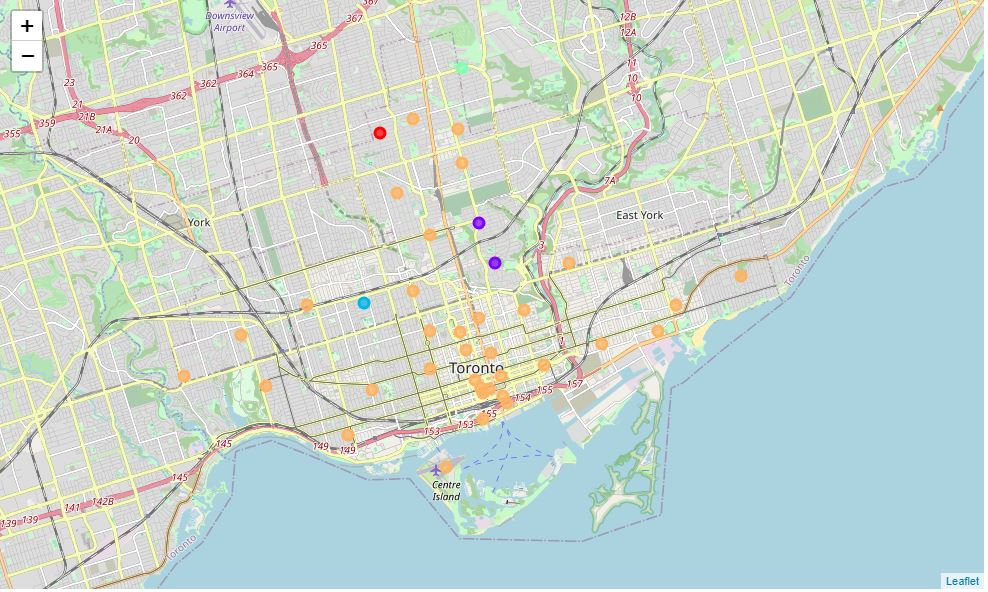

# Examining the Clusters

In [197]:
# The list made from ( range of 5 (corresponding to 1st Most Common Veue column) to number of columns of df)
list(range(5, toronto_merged.shape[1]))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [199]:
#Adding the 2nd column (coresponding to Neighbourhood) to it.
[[1] + list(range(5, toronto_merged.shape[1]))]

[[1, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]]

In [212]:
# The list made from  Neighbourhood and range of 5 (corresponding to 1st Most Common Veue column) to number of columns of df)
toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]

Index(['Neighbourhood', '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue'],
      dtype='object')

In [213]:
#Separating the following cell for clear understanding
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0]

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Central Toronto,Roselawn,43.711695,-79.416936,0,Ice Cream Shop,Garden,Pool,Music Venue,Yoga Studio,Dog Run,Diner,Discount Store,Distribution Center,Donut Shop


### Cluster 1

In [204]:
#We get an intersection from the df and the columns mentioned above.
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]


,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Roselawn,Ice Cream Shop,Garden,Pool,Music Venue,Yoga Studio,Dog Run,Diner,Discount Store,Distribution Center,Donut Shop


### Cluster 2

In [205]:
#We take the similar step for the 2nd cluster
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,"Moore Park, Summerhill East",Restaurant,Park,Tennis Court,Trail,Dog Run,Dessert Shop,Diner,Discount Store,Distribution Center,Donut Shop
10,Rosedale,Park,Playground,Trail,Yoga Studio,Dessert Shop,Event Space,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant


### Cluster 3

In [206]:
#We take the similar step for the 3rd cluster
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,Christie,Grocery Store,Café,Park,Candy Store,Baby Store,Italian Restaurant,Restaurant,Nightclub,Bank,Coffee Shop


### Cluster 4

In [207]:
#We take the similar step for the 4th cluster
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Lawrence Park,Park,Bus Line,Swim School,Business Service,Yoga Studio,Discount Store,Event Space,Ethiopian Restaurant,Escape Room,Electronics Store


### Cluster 5

In [208]:
#We take the similar step for the 5th cluster
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,The Beaches,Neighborhood,Pub,Asian Restaurant,Health Food Store,Coffee Shop,Trail,Discount Store,Distribution Center,Dog Run,Doner Restaurant
1,"The Danforth West, Riverdale",Greek Restaurant,Italian Restaurant,Coffee Shop,Bookstore,Furniture / Home Store,Ice Cream Shop,Pub,Caribbean Restaurant,Restaurant,Café
2,"India Bazaar, The Beaches West",Fast Food Restaurant,Sandwich Place,Sushi Restaurant,Steakhouse,Brewery,Italian Restaurant,Pub,Fish & Chips Shop,Movie Theater,Ice Cream Shop
3,Studio District,Coffee Shop,Bakery,Brewery,Gastropub,American Restaurant,Café,Yoga Studio,Cheese Shop,Italian Restaurant,Fish Market
5,Davisville North,Pizza Place,Hotel,Breakfast Spot,Food & Drink Shop,Sandwich Place,Dance Studio,Department Store,Park,Gym / Fitness Center,Convenience Store
6,"North Toronto West, Lawrence Park",Clothing Store,Coffee Shop,Café,Restaurant,Salon / Barbershop,Bagel Shop,Chinese Restaurant,Mexican Restaurant,Sporting Goods Shop,Fast Food Restaurant
7,Davisville,Pizza Place,Sandwich Place,Dessert Shop,Sushi Restaurant,Café,Park,Coffee Shop,Italian Restaurant,Gym,Diner
9,"Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park",Coffee Shop,Pizza Place,Pub,Restaurant,Bank,Supermarket,Sushi Restaurant,Bagel Shop,Liquor Store,Fried Chicken Joint
11,"St. James Town, Cabbagetown",Coffee Shop,Park,Café,Restaurant,Pub,Bakery,Pizza Place,Convenience Store,Italian Restaurant,Japanese Restaurant
12,Church and Wellesley,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Restaurant,Gay Bar,Pub,Men's Store,Mediterranean Restaurant,Hotel,Fast Food Restaurant
